
# Assignment 1: Code for dataset preparation report

### Michael Teixeira S4133975

#### Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = 'S4133975.csv'
df = pd.read_csv(file_path, sep=',', decimal='.', header=0)

#### Data inspection

In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                1482 non-null   int64  
 1   Age                       1482 non-null   object 
 2   Resigned                  1480 non-null   object 
 3   BusinessTravel            1482 non-null   object 
 4   BusinessUnit              1482 non-null   object 
 5   EducationLevel            1481 non-null   float64
 6   Gender                    1482 non-null   object 
 7   JobSatisfaction           1481 non-null   float64
 8   MaritalStatus             1482 non-null   object 
 9   MonthlyIncome             1479 non-null   float64
 10  NumCompaniesWorked        1482 non-null   int64  
 11  OverTime                  1479 non-null   object 
 12  PercentSalaryHike         1482 non-null   int64  
 13  PerformanceRating         1482 non-null   int64  
 14  AverageW

In [4]:
# Display the first few rows of the dataset
df.head()

,EmployeeID,Age,Resigned,BusinessTravel,BusinessUnit,EducationLevel,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
0,7912,41,Yes,Travel_Rarely,Sales,2.0,Female,4.0,Single,5993.0,...,11,3,63.0,8,0,1.0,6,4,0,5
1,1520,49,No,Travel_Frequently,Consultants,1.0,Male,2.0,Married,5130.0,...,23,4,40.0,10,3,3.0,10,7,1,7
2,1488,37,Yes,Travel_Rarely,Consultants,2.0,Male,3.0,Single,2090.0,...,15,3,50.0,7,3,3.0,0,0,0,0
3,2535,33,No,Travel_Frequently,Consultants,4.0,Female,3.0,Married,2909.0,...,11,3,48.0,8,3,3.0,8,7,3,0
4,4582,27,No,Travel_Rarely,Consultants,1.0,Male,2.0,Married,3468.0,...,12,3,40.0,6,3,3.0,2,2,2,2


The dataset contains 1482 observations and total of 22 variables with 5 of float64, 10 of int64 and 7 of object data type.

#### Data Cleaning

We'll now handle missing values, correct inconsistencies, and adjust data types as needed. This will create a clean dataset for our analysis.

In [5]:
# Check unique values for each column
columns_to_check = [
    'EmployeeID', 'Age', 'Resigned', 'BusinessTravel', 'BusinessUnit',
    'EducationLevel', 'Gender', 'JobSatisfaction', 'MaritalStatus',
    'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
    'PerformanceRating', 'AverageWeeklyHoursWorked', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

unique_values = {}

for column in columns_to_check:
    if column in df.columns:
        unique_values[column] = df[column].unique()
    else:
        print(f"Column '{column}' not found in the DataFrame")

# Print the unique values for each column
for column, values in unique_values.items():
    print(f"{column}:")
    print(values)
    print()

EmployeeID:
[7912 1520 1488 ... 9017 2477 3238]

Age:
['41' '49' '37' '33' '27' '32' '59' '30' '38' '36' '35' '29' '31' '34'
 '28' '22' '53' '24' '21' '42' '44' '46' '39' '43' '50' '26' '48' '55'
 '45' '56' '23' '51' '40' '54' '58' '20' '25' '19' '57' '52' '47' '18'
 '60' '36a']

Resigned:
['Yes' 'No' 'Y' nan 'NO' 'N' 'no']

BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'Travels_Rarely'
 'TRAVEL_RARELY' 'rarely_travel']

BusinessUnit:
['Sales' 'Consultants' 'Business Operations' 'Female']

EducationLevel:
[ 2.  1.  4.  3.  5. nan]

Gender:
['Female' 'Male' '      Male' '    Female' 'Sales' 'MMale' 'M' 'male']

JobSatisfaction:
[ 4.  2.  3.  1. nan]

MaritalStatus:
['Single' 'Married' 'Divorced' '       Divorced' '         Single' 'D']

MonthlyIncome:
[5993. 5130. 2090. ... 3935. 3700. 4802.]

NumCompaniesWorked:
[8 1 6 9 0 4 5 2 7 3]

OverTime:
['Yes' 'No' nan]

PercentSalaryHike:
[11 23 15 12 13 20 22 21 17 14 16 18 19 24 25  6 10  0]

PerformanceRating:
[3 4 2]

A

In [6]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [7]:
# Age: Replace '36a' with '36' and change to numeric data type
df['Age'] = df['Age'].replace('36a', '36')
df['Age'] = pd.to_numeric(df['Age'])


In [8]:
# # Resigned: Handled typo errors and inconsistencies
df['Resigned'] = df['Resigned'].str.title().replace({'Y': 'Yes', 'N': 'No'})
df['Resigned'].value_counts()

Resigned
No     1241
Yes     239
Name: count, dtype: int64

In [9]:
# BusinessTravel: Handled typo errors and inconsistencies
df['BusinessTravel'] = df['BusinessTravel'].replace({
    'Travels_Rarely': 'Travel_Rarely',
    'TRAVEL_RARELY': 'Travel_Rarely',
    'rarely_travel': 'Travel_Rarely'
})
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1051
Travel_Frequently     279
Non-Travel            152
Name: count, dtype: int64

In [10]:
# Find rows where 'Female' is in the BusinessUnit column
business_unit_misspelling = df[df['BusinessUnit'] == 'Female']
print(business_unit_misspelling)  

      EmployeeID  Age Resigned BusinessTravel BusinessUnit  EducationLevel  \
1470        9465   56      Yes  Travel_Rarely       Female             2.0   

     Gender  JobSatisfaction MaritalStatus  MonthlyIncome  ...  \
1470  Sales              4.0        Single         4993.0  ...   

      PercentSalaryHike PerformanceRating  AverageWeeklyHoursWorked  \
1470                  6                 3                      64.0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
1470                  8                      0              1.0   

      YearsAtCompany  YearsInRole  YearsSinceLastPromotion  \
1470               6            4                        0   

      YearsWithCurrManager  
1470                     5  

[1 rows x 22 columns]


In [11]:
# Replace ' female' with 'Sales' in BusinessUnit column
df['BusinessUnit'] = df['BusinessUnit'].replace('Female', 'Sales')

# Replace 'Sales' with 'Female' in Gender column
df['Gender'] = df['Gender'].replace('Sales', 'Female')

In [12]:
# Print the values after the change
print(df.loc[1470, ['BusinessUnit', 'Gender']])


BusinessUnit     Sales
Gender          Female
Name: 1470, dtype: object


In [13]:
# Gender: Clean and standardize
df['Gender'] = df['Gender'].replace({
    'MMale': 'Male',
    'M': 'Male'
}).str.strip().str.title()
df['Gender'].value_counts()

Gender
Male      887
Female    595
Name: count, dtype: int64

In [14]:
# MaritalStatus: Clean and standardize
df['MaritalStatus'] = df['MaritalStatus'].replace({
    'D': 'Divorced'
}).str.strip()
df['MaritalStatus'].value_counts()

MaritalStatus
Married     679
Single      475
Divorced    328
Name: count, dtype: int64

In [15]:
# Print unique values after cleaning
for column in df.columns:
    print(f"{column}:")
    print(df[column].unique())
    print()


EmployeeID:
[7912 1520 1488 ... 9017 2477 3238]

Age:
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

Resigned:
['Yes' 'No' nan]

BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

BusinessUnit:
['Sales' 'Consultants' 'Business Operations']

EducationLevel:
[ 2.  1.  4.  3.  5. nan]

Gender:
['Female' 'Male']

JobSatisfaction:
[ 4.  2.  3.  1. nan]

MaritalStatus:
['Single' 'Married' 'Divorced']

MonthlyIncome:
[5993. 5130. 2090. ... 3935. 3700. 4802.]

NumCompaniesWorked:
[8 1 6 9 0 4 5 2 7 3]

OverTime:
['Yes' 'No' nan]

PercentSalaryHike:
[11 23 15 12 13 20 22 21 17 14 16 18 19 24 25  6 10  0]

PerformanceRating:
[3 4 2]

AverageWeeklyHoursWorked:
[ 63.  40.  50.  48.  52.  51.  54.  47.  53.  46.  45.  56.  55.  49.
  57.  66.  69.  67.  62.  70.  64.  71.  65. 400.]

TotalWorkingYears:
[ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 3

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

EmployeeID                  0
Age                         0
Resigned                    2
BusinessTravel              0
BusinessUnit                0
EducationLevel              1
Gender                      0
JobSatisfaction             1
MaritalStatus               0
MonthlyIncome               3
NumCompaniesWorked          0
OverTime                    3
PercentSalaryHike           0
PerformanceRating           0
AverageWeeklyHoursWorked    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             1
YearsAtCompany              0
YearsInRole                 0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [17]:
# Replace missing numerical columns with median and categorical columns with mode
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Check again for missing values
missing_values = df.isnull().sum()
print(missing_values)

EmployeeID                  0
Age                         0
Resigned                    0
BusinessTravel              0
BusinessUnit                0
EducationLevel              0
Gender                      0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
AverageWeeklyHoursWorked    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInRole                 0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [18]:
# Define the data types 

data_types = {
    'Resigned': 'category',
    'BusinessTravel': 'category',
    'BusinessUnit': 'category',
    'Gender': 'category',
    'MaritalStatus': 'category',
    'OverTime': 'category',    
}


# Apply the data types to the dataframe
df = df.astype(data_types)

In [19]:
df.dtypes

EmployeeID                     int64
Age                            int64
Resigned                    category
BusinessTravel              category
BusinessUnit                category
EducationLevel               float64
Gender                      category
JobSatisfaction              float64
MaritalStatus               category
MonthlyIncome                float64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
AverageWeeklyHoursWorked     float64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance              float64
YearsAtCompany                 int64
YearsInRole                    int64
YearsSinceLastPromotion        int64
YearsWithCurrManager           int64
dtype: object

In [20]:
# Sanity checks: 
# Age should be at least 18
invalid_ages = df[(df['Age'] < 18)]
print(f"Rows with invalid ages: {len(invalid_ages)}")

# Years at company should not exceed total working years
invalid_years_at_company = df[(df['YearsAtCompany'] > df['TotalWorkingYears'])]
print(f"Rows with invalid years at company: {len(invalid_years_at_company)}")
print(invalid_years_at_company)

# Replace the invalid total working years with the correct value
df.loc[1472, 'TotalWorkingYears'] = 1


Rows with invalid ages: 0
Rows with invalid years at company: 1
      EmployeeID  Age Resigned BusinessTravel BusinessUnit  EducationLevel  \
1472        5560   23       No  Travel_Rarely  Consultants             2.0   

     Gender  JobSatisfaction MaritalStatus  MonthlyIncome  ...  \
1472   Male              4.0        Single         4900.0  ...   

      PercentSalaryHike PerformanceRating  AverageWeeklyHoursWorked  \
1472                 10                 4                      40.0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
1472                  0                      2              3.0   

      YearsAtCompany  YearsInRole  YearsSinceLastPromotion  \
1472               1            1                        0   

      YearsWithCurrManager  
1472                     1  

[1 rows x 22 columns]


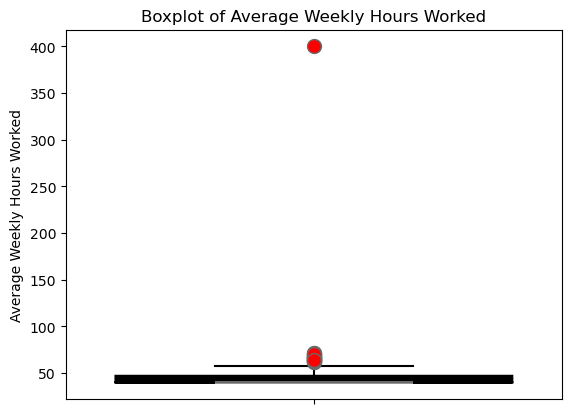

In [21]:
# Detect outliers using Boxplot and handling them

# Create the boxplot for AverageWeeklyHoursWorked
sns.boxplot(y='AverageWeeklyHoursWorked', data=df, notch=True, palette='Set3',
            boxprops=dict(facecolor='blue', color='black'),
            capprops=dict(color='black'), whiskerprops=dict(color='black'), flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.ylabel('Average Weekly Hours Worked')
plt.title('Boxplot of Average Weekly Hours Worked')
plt.show()  # There is at least one obvious outlier

In [22]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)
    return outliers

# Detect outliers for 'AverageWeeklyHoursWorked'
detect_outliers(df, 'AverageWeeklyHoursWorked')  # row 1481 is definitely a outlier, as it is impossible to work on average 400 hours per week. It seems to be a data entry error.

df.loc[1481, 'AverageWeeklyHoursWorked'] = 40  # We assume that the correct value is 40.

# All the others outliers seem to be realistic numbers

Outliers in AverageWeeklyHoursWorked:
      EmployeeID  Age Resigned     BusinessTravel         BusinessUnit  \
0           7912   41      Yes      Travel_Rarely                Sales   
91          1771   51       No      Travel_Rarely                Sales   
139         2133   30       No      Travel_Rarely  Business Operations   
152         7537   53       No      Travel_Rarely                Sales   
163         4770   57       No      Travel_Rarely          Consultants   
234         4566   33      Yes      Travel_Rarely          Consultants   
239         1821   32      Yes      Travel_Rarely          Consultants   
286         9666   44      Yes  Travel_Frequently          Consultants   
312         5291   31       No      Travel_Rarely          Consultants   
463         8305   26      Yes      Travel_Rarely          Consultants   
559         3749   38       No      Travel_Rarely          Consultants   
656         5853   32      Yes      Travel_Rarely          Consultants   


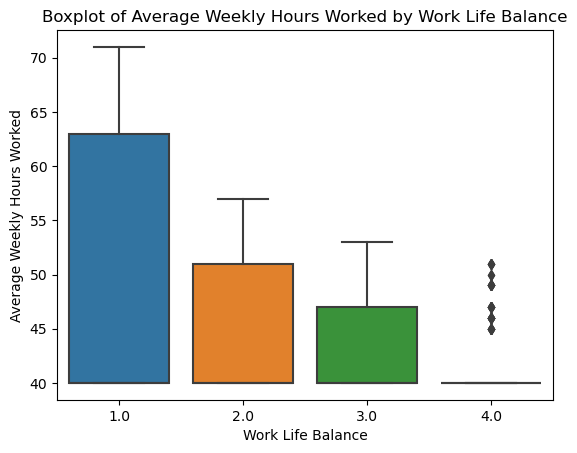

In [23]:
# Boxplot showing distribution of 'AverageWeeklyHoursWorked' for each category of 'WorkLifeBalance'
sns.boxplot(x='WorkLifeBalance', y='AverageWeeklyHoursWorked', data=df)
plt.xlabel('Work Life Balance')
plt.ylabel('Average Weekly Hours Worked')
plt.title('Boxplot of Average Weekly Hours Worked by Work Life Balance')
plt.show()

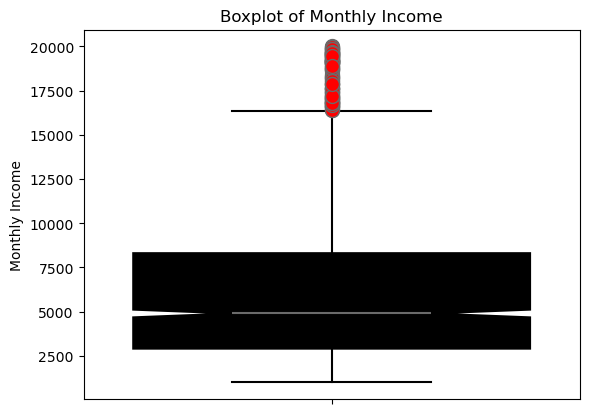

In [24]:
# Create the boxplot for MonthlyIncome
sns.boxplot(y='MonthlyIncome', data=df, notch=True, palette='Set3',
            boxprops=dict(facecolor='blue', color='black'),
            capprops=dict(color='black'), whiskerprops=dict(color='black'), flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.ylabel('Monthly Income')
plt.title('Boxplot of Monthly Income')
plt.show()  

# The values displayed as outliers seem to be real, so no changes are required.

Missing values have been imputed, inconsistencies standardized, data types corrected, and outliers handled. Our dataset is now ready for in-depth analysis.

#### Exploratory Data Analysis

With clean data, we'll now explore patterns and relationships using statistical summaries and visualizations.

In [25]:
# Summary statistics
df.describe()

,EmployeeID,Age,EducationLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,AverageWeeklyHoursWorked,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,5511.929825,36.890013,2.913630,2.733468,6484.586370,2.695682,15.186910,3.153846,43.055331,11.244265,2.795547,2.761808,6.997976,4.230769,2.191633,4.119433
std,2571.620110,9.143432,1.023342,1.100525,4693.846366,2.502362,3.686868,0.362789,5.407341,7.767276,1.288565,0.707306,6.112108,3.618830,3.225864,3.563247
min,1006.000000,18.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,2.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3301.250000,30.000000,2.000000,2.000000,2914.750000,1.000000,12.000000,3.000000,40.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,5528.000000,36.000000,3.000000,3.000000,4900.000000,2.000000,14.000000,3.000000,40.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,7776.000000,43.000000,4.000000,4.000000,8307.750000,4.000000,18.000000,3.000000,47.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,9998.000000,60.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,71.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


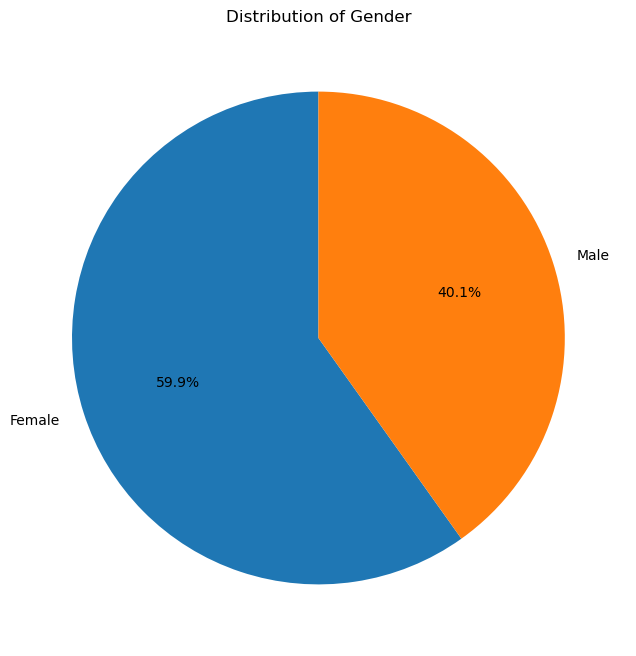

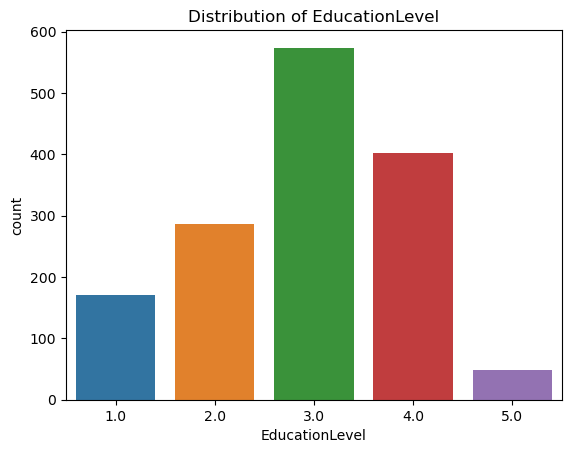

c:\Users\mike_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


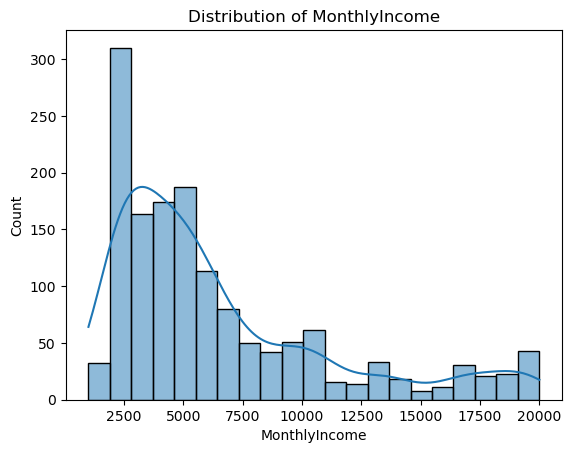

In [26]:
# Create visualisations for analysis

# Nominal, Ordinal, and Interval/Ratio columns
nominal_column = df['Gender'].value_counts()
ordinal_column = 'EducationLevel'
ratio_column = 'MonthlyIncome'

# Pie chart of employees' gender distribution
plt.figure(figsize=(8, 8))
plt.pie(nominal_column, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90,)
plt.title('Distribution of Gender')
plt.show()

# Bar chart of education level distribution
sns.countplot(x=ordinal_column, data=df)
plt.title(f'Distribution of {ordinal_column}')
plt.show()

# Histogram of monthly income distribution
sns.histplot(df[ratio_column], kde=True)
plt.title(f'Distribution of {ratio_column}')
plt.show()



c:\Users\mike_\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


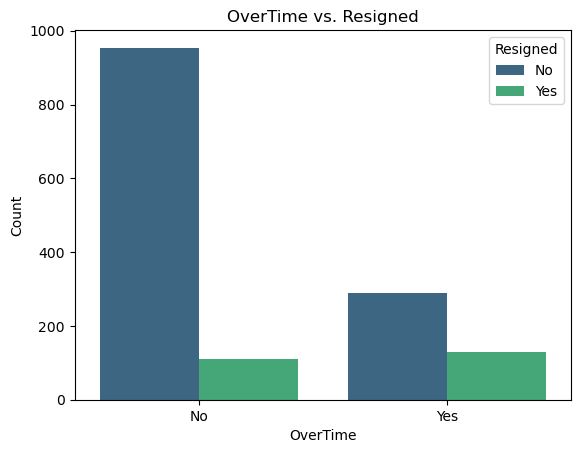

c:\Users\mike_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mike_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\mike_\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


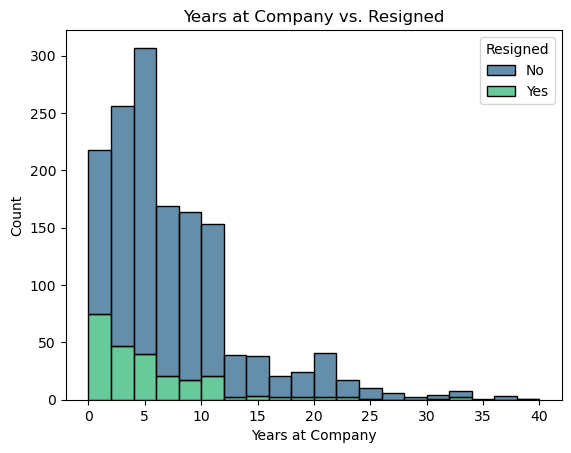

c:\Users\mike_\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


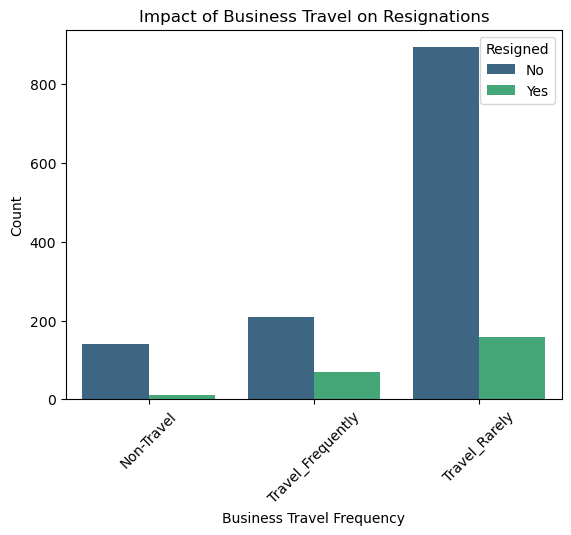

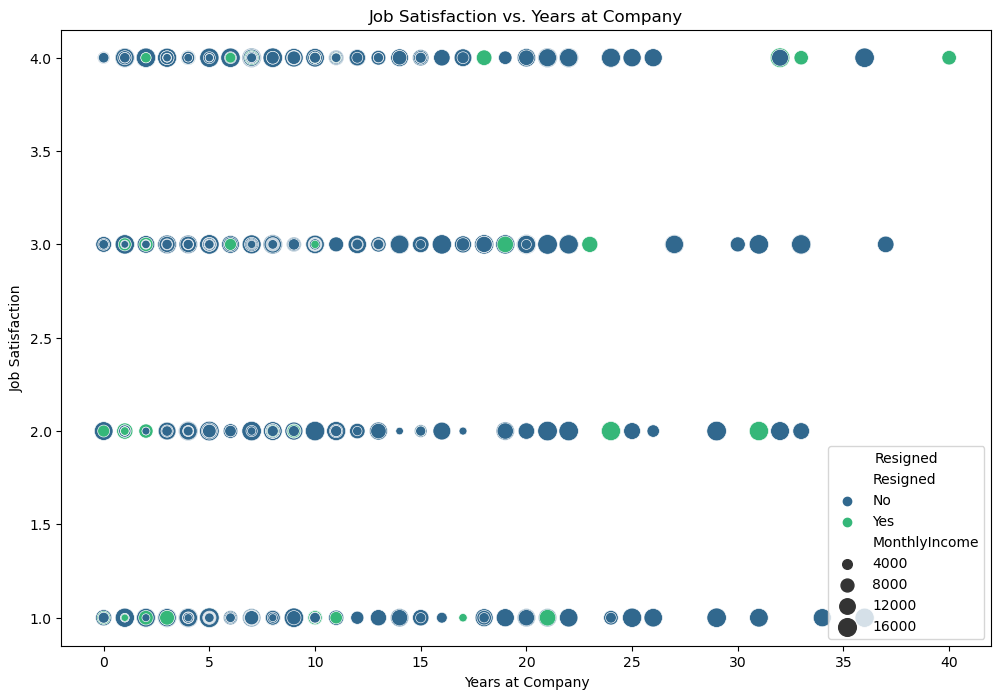

In [27]:
# Relationships Between Columns"

# OverTime vs. Resigned
sns.countplot(data=df, x='OverTime', hue='Resigned', palette='viridis')
plt.title('OverTime vs. Resigned')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()

# Years at Company vs. Resigned
sns.histplot(data=df, x='YearsAtCompany', hue='Resigned', multiple='stack', palette='viridis', kde=False, bins=20)
plt.title('Years at Company vs. Resigned')
plt.xlabel('Years at Company')
plt.ylabel('Count')
plt.show()

# Impact of Business Travel on Resignations
sns.countplot(x='BusinessTravel', hue='Resigned', data=df, palette='viridis')
plt.title('Impact of Business Travel on Resignations')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Resigned')
plt.show()

# Job Satisfaction vs. Years at Company (with resignation)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='YearsAtCompany', y='JobSatisfaction', hue='Resigned', size='MonthlyIncome', data=df, sizes=(20, 200), palette='viridis')
plt.title('Job Satisfaction vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Job Satisfaction')
plt.legend(title='Resigned', loc='lower right')
plt.show()


Our analysis has revealed:

    - Bigger resign rates for people that do overtime, travel frequently, and are new with the company. The low monthly income could also be a factor specially in cases where job satisfaction is higher.

These insights provide direction for further investigation and potential business applications.

In [28]:
# Save the cleaned and prepared dataset
df.to_csv('assignment1.csv', index=False)